In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
coord = []

for i in range(L):
    for j in range(L):
        coord.append((i, j))

In [9]:
A = []

for i in range(L):
    temp = []
    for j in range(L):
        #temp.append(random.choice(S)) 
        temp.append(1)
    A.append(temp)

In [107]:
def Ising(T = 2, L = 100, fill = 0, time = 15000):
    S = [-1,1]
    N = L**2
    beta = 1/T
    coord = []
    A = []

    for i in range(L):
        for j in range(L):
            coord.append((i - 1, j - 1)) #coord.append((i, j))
    
    if fill == 0:
        for i in range(L):
            temp = []
            for j in range(L):
                temp.append(random.choice(S))
            A.append(temp)
    else:
        for i in range(L):
            temp = []
            for j in range(L):
                temp.append(fill)
            A.append(temp)
    
    e = - sum(A[i][j]*A[i - 1][j] + A[i][j]*A[i][j - 1] for i in range(L) for j in range(L))
    m = sum(A[i][j] for i in range(L) for j in range(L))
    
    steps = time*N
    k = 0
    e_mass = []
    m_mass = []
    
    while k < steps:
        (x, y) = random.choice(coord) #(v, w) = random.choice(coord)
        dh = 2*A[x][y]*sum(A[x + i][y + j] for i in S for j in S) #dh = 2*A[v - 1][w - 1]*sum(A[v + i - 1][w + j - 1] for i in S for j in S) #Delta_ham(v, w, A)
        #x = v - 1
        #y = w - 1
        if dh <= 0:
            A[x][y] *= -1
            a = A[x][y]
            e += dh #dh/2 #2*a*(A[x - 1][y] + A[x][y - 1])
            m += 2*a
        else:
            if random.random() < np.exp(-beta*dh):
                A[x][y] *= -1
                a = A[x][y]
                e += dh #dh/2
                m += 2*a
        if k % N == 0:
            e_mass.append(e/N)
            m_mass.append(m/N)
        k += 1
    return m_mass, e_mass, time, T, fill

In [101]:
def main(): #T=2
    for i in S:
        link = 'Ising_data_fill_pm' + str(i + 1)
        with open(link , 'wb') as fp:
            pickle.dump(Ising(fill = i), fp)
    for i in range(2):
        link = 'Ising_data_random_' + str(i + 1)
        with open(link , 'wb') as fp:
            pickle.dump(Ising(), fp)

In [70]:
def re_main(): #second version
    link = 'Ising_data_random_1'
    with open(link , 'wb') as fp:
        pickle.dump(Ising(), fp)

In [140]:
#main() #Four: 1:00 - 2:14  #One: 2:27 - 2:44  #Two: 2:55 - 3:32

In [3]:
with open ('Ising_data_fill_pm0', 'rb') as fp:
    data0 = pickle.load(fp)
with open ('Ising_data_fill_pm2', 'rb') as fp:
    data2 = pickle.load(fp)

In [4]:
with open ('Ising_data_random_1', 'rb') as fp:
    data_random_1 = pickle.load(fp)
with open ('Ising_data_random_2', 'rb') as fp:
    data_random_2 = pickle.load(fp)

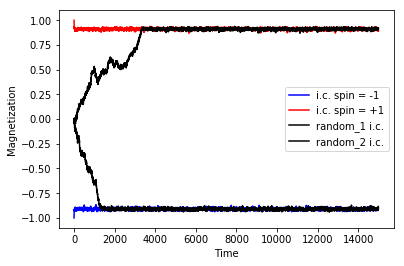

In [5]:
plt.plot(range(data0[2]), data0[0], color = 'blue', label = 'i.c. spin = -1')
plt.plot(range(data2[2]), data2[0], color = 'red', label = 'i.c. spin = +1')
plt.plot(range(data_random_1[2]), data_random_1[0], color = 'black', label = 'random_1 i.c.')
plt.plot(range(data_random_2[2]), data_random_2[0], color = 'black', label = 'random_2 i.c.')
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.legend()

plt.show()

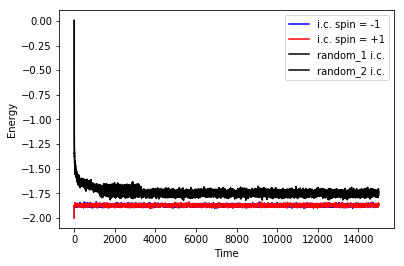

In [6]:
plt.plot(range(data0[2]), data0[1], color = 'blue', label = 'i.c. spin = -1')
plt.plot(range(data2[2]), data2[1], color = 'red', label = 'i.c. spin = +1')
plt.plot(range(data_random_1[2]), data_random_1[1], color = 'black', label = 'random_1 i.c.')
plt.plot(range(data_random_2[2]), data_random_2[1], color = 'black', label = 'random_2 i.c.')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()

plt.show()

In [147]:
def task2(): #T=2.5
    for i in S:
        link = 'Ising_data_h_fill_pm' + str(i + 1)
        with open(link , 'wb') as fp:
            pickle.dump(Ising(T = 2.5, fill = i), fp)
    link = 'Ising_data_h_random'
    with open(link , 'wb') as fp:
        pickle.dump(Ising(T = 2.5), fp)

In [148]:
#task2()

In [7]:
with open ('Ising_data_h_fill_pm0', 'rb') as fp:
    data_h0 = pickle.load(fp)
with open ('Ising_data_h_fill_pm2', 'rb') as fp:
    data_h2 = pickle.load(fp)

In [8]:
with open ('Ising_data_h_random', 'rb') as fp:
    data_h_random = pickle.load(fp)

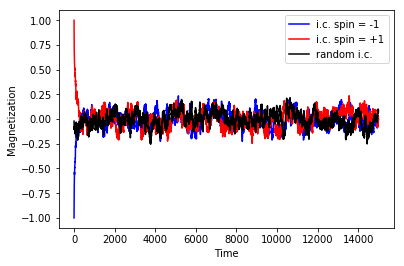

In [9]:
plt.plot(range(data_h0[2]), data_h0[0], color = 'blue', label = 'i.c. spin = -1')
plt.plot(range(data_h2[2]), data_h2[0], color = 'red', label = 'i.c. spin = +1')
plt.plot(range(data_h_random[2]), data_h_random[0], color = 'black', label = 'random i.c.')
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.legend()

plt.show()

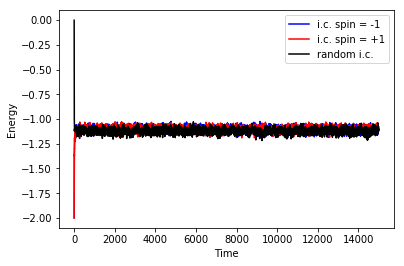

In [10]:
plt.plot(range(data_h0[2]), data_h0[1], color = 'blue', label = 'i.c. spin = -1')
plt.plot(range(data_h2[2]), data_h2[1], color = 'red', label = 'i.c. spin = +1')
plt.plot(range(data_h_random[2]), data_h_random[1], color = 'black', label = 'random i.c.')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()

plt.show()

In [18]:
def task3():
    for i in range(1, 41):
        link = 'Ising_data_t_' + str(i)
        with open(link , 'wb') as fp:
            pickle.dump(Ising(T = i/10, time = 10000), fp)

In [174]:
def re_task3():
    blocklist = [3]
    for i in blocklist:
        link = 'Ising_data_t_' + str(i)
        with open(link , 'wb') as fp:
            pickle.dump(Ising(T = i/10, time = 10000), fp)

In [19]:
#task3()

In [177]:
#re_task3()

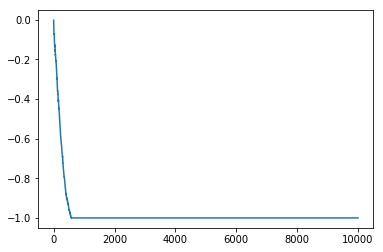

In [178]:
blocklist = [3]
link = 'Ising_data_t_' + str(3)#blocklist[8])

with open (link, 'rb') as fp:
    data = pickle.load(fp)

plt.plot(range(data[2]), data[0])

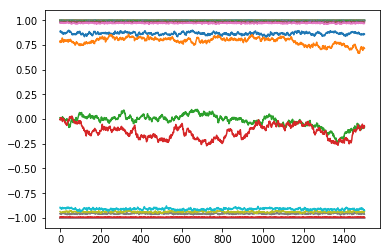

In [187]:
for i in range(1, 25):
    link = 'Ising_data_t_' + str(i)
    with open (link, 'rb') as fp:
        data = pickle.load(fp)
        plt.plot(list(range(1500)), data[0][-1501: -1])
plt.show()

In [209]:
m_over_t = []
e_over_t = []
Xi = []
C = []
L = 100
N = L**2

for i in range(1, 41):
    link = 'Ising_data_t_' + str(i)
    with open (link, 'rb') as fp:
        data = pickle.load(fp)
        #plt.plot(list(range(1500)), data[0][-1501: -1])
        m_over_t.append(np.abs(np.mean(data[0][-1501: -1])))
        e_over_t.append(np.mean(data[1][-1501: -1]))
        Xi.append((1/data[3])*N*(np.mean([x**2 for x in data[0][-1501: -1]] - np.mean(data[0][-1501: -1]) ** 2)))
        C.append(((1/data[3])**2)*N*(np.mean([x**2 for x in data[1][-1501: -1]] - np.mean(data[1][-1501: -1]) ** 2)))

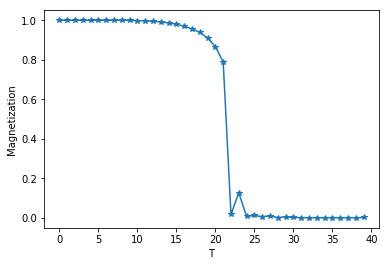

In [210]:
plt.plot(range(len(m_over_t)), m_over_t, marker = '*')
plt.xlabel('T')
plt.ylabel('Magnetization')

plt.show()

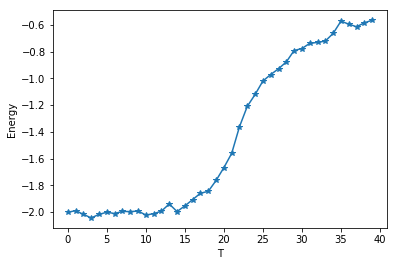

In [211]:
plt.plot(range(len(e_over_t)), e_over_t, marker = '*')
plt.xlabel('T')
plt.ylabel('Energy')

plt.show()

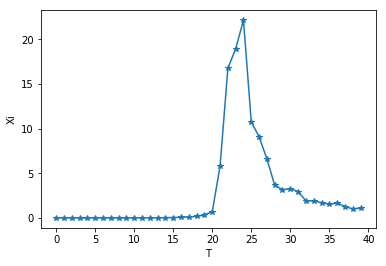

In [212]:
plt.plot(range(len(Xi)), Xi, marker = '*')
plt.xlabel('T')
plt.ylabel('Xi')

plt.show()

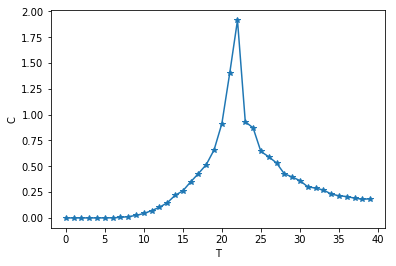

In [213]:
plt.plot(range(len(C)), C, marker = '*')
plt.xlabel('T')
plt.ylabel('C')

plt.show()

In [342]:
def task4(T = 2, time = 20000):
    S = [-1,1]
    L = 100
    N = L ** 2
    beta = 1/T
    coord = []
    A = []

    for i in range(L):
        for j in range(L):
            coord.append((i - 1, j - 1))
    
    for i in range(L):
        temp = []
        for j in range(L):
            temp.append(random.choice(S))
        A.append(temp)
    
    e = - sum(A[i][j]*A[i - 1][j] + A[i][j]*A[i][j - 1] for i in range(L) for j in range(L))
    m = sum(A[i][j] for i in range(L) for j in range(L))
    
    steps = time*N + 1
    k = 0
    sample = []
    
    while k < steps:
        (x, y) = random.choice(coord)
        dh = 2*A[x][y]*sum(A[x + i][y + j] for i in S for j in S)
        if dh <= 0:
            A[x][y] *= -1
        else:
            if random.random() < np.exp(-beta*dh):
                A[x][y] *= -1
        if k % (2000*N) == 0:
            sample.append(np.copy(A))
            plt.matshow(sample[len(sample) - 1])
            plt.show()
        k += 1
    return sample

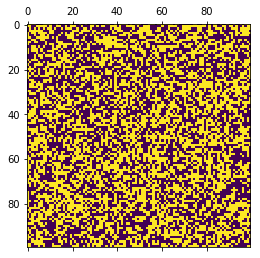

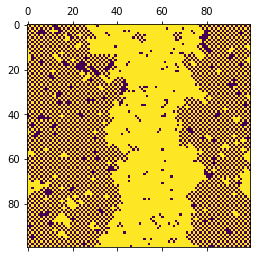

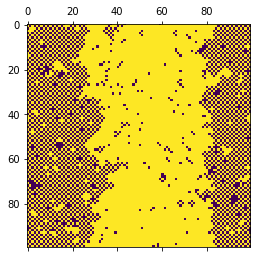

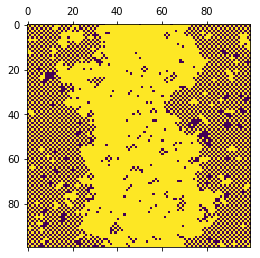

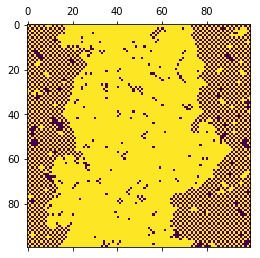

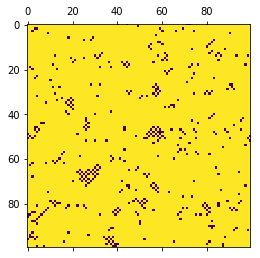

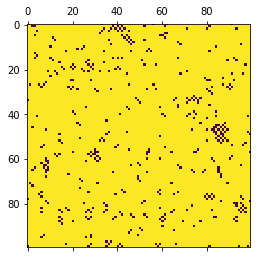

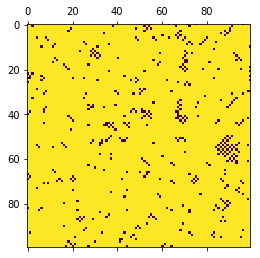

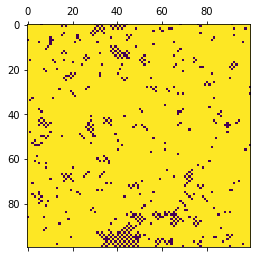

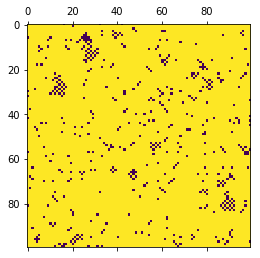

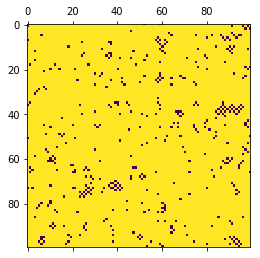

In [343]:
to_plot = task4()

In [344]:
link = 'Task_4_T_2'
with open(link , 'wb') as fp:
    pickle.dump(to_plot, fp)

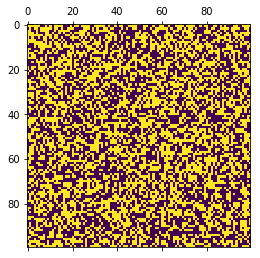

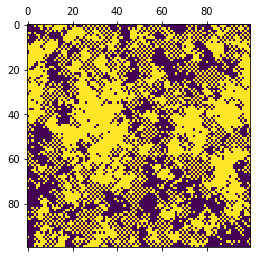

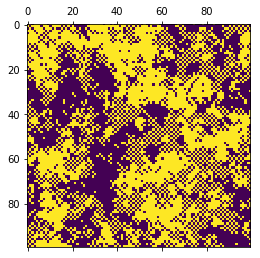

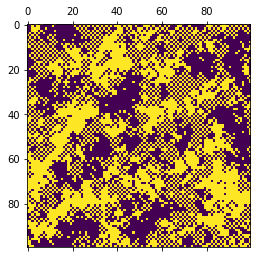

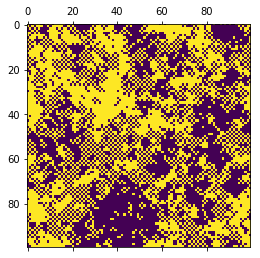

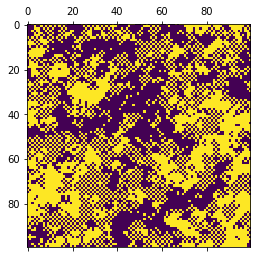

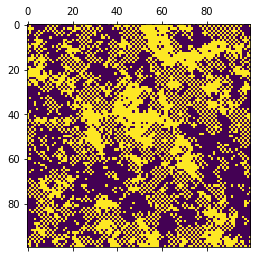

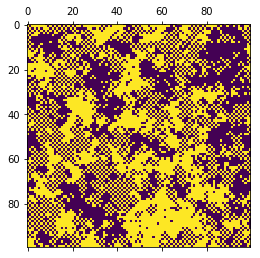

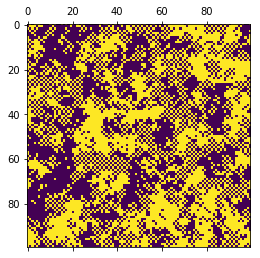

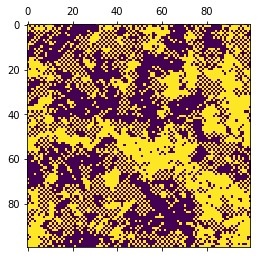

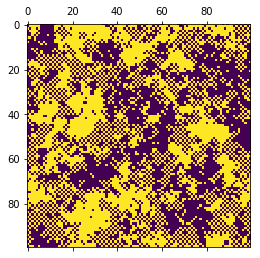

In [346]:
to_plot_2 = task4(T = 2.5)

In [347]:
link = 'Task_4_T_2_5'
with open(link , 'wb') as fp:
    pickle.dump(to_plot_2, fp)

# Testing site

In [10]:
#e = - sum(A[i][j]*A[i - 1][j] + A[i][j]*A[i][j - 1] for i in range(L) for j in range(L))
#e_mass = [e/N]
#print(e_mass)

[-2.0]


In [11]:
#m = sum(A[i][j] for i in range(L) for j in range(L))
#m_mass = [m/N]
#print(m_mass)

[1.0]


In [12]:
#def Delta_ham(x, y, A):
#    return 2*A[x - 1][y - 1]*sum(A[x + i - 1][y + j - 1] for i in S for j in S)

In [13]:
time = 100
steps = time*N
k = 0
e_mass = []
m_mass = []

while k < steps:
    (v, w) = random.choice(coord)
    dh = Delta_ham(v, w, A)
    x = v - 1
    y = w - 1
    if dh < 0:
        A[x][y] *= -1
        a = A[x][y]
        e -= 2*a*(A[x - 1][y] + A[x][y - 1])
        m += 2*a
    elif random.random() < np.exp(-beta*dh):
            A[x][y] *= -1
            a = A[x][y]
            e -= 2*a*(A[x - 1][y] + A[x][y - 1])
            m += 2*a
    if k % N == 0:
        e_mass.append(e/N)
        m_mass.append(m/N)
    k += 1

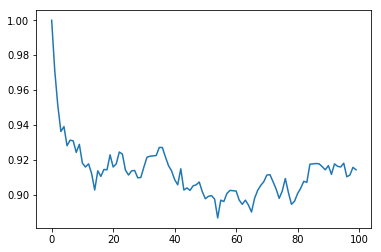

In [14]:
#plt.plot(range(time), m_mass)

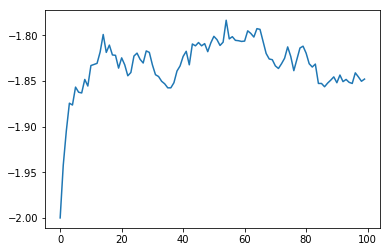

In [15]:
#plt.plot(range(time), e_mass)

In [334]:
#to_plot[0].append()

In [297]:
#test = to_plot[0]

In [218]:
#data = Ising(time = 1000)

#plt.plot(range(data[2]), data[0])

In [89]:
#data = Ising(fill = -1, time = 100)

#plt.matshow(data[5])

In [329]:
A = np.array([1,2,3,4])
B = []

for i in range(len(A)):
    B.append(A.copy())
    A[i] = 5

print(B)

[array([1, 2, 3, 4]), array([5, 2, 3, 4]), array([5, 5, 3, 4]), array([5, 5, 5, 4])]
